# Chart election winner at sportsbet

## Python set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mgplot as mg
from common import RFOOTER

In [2]:
# plotting constants
LFOOTER = (
    "Betting odds observed daily at sportsbet.com.au "
    + "(gaps = missing observations). "
)
footers = {"lfooter": LFOOTER, "rfooter": RFOOTER}
SHOW = True

In [3]:
# plotting directory set-up
def set_up_plotting() -> None:
    """Set up plotting."""

    mg.set_chart_dir("../charts/election-winner/")
    mg.clear_chart_dir()


set_up_plotting()

## Get data

In [4]:
FILE = "../betting-data/sportsbet-2028-election-winner.csv"
data = pd.read_csv(FILE, index_col=0, header=0, skiprows=None)
data = (
    data.pivot(columns="Party")
    .droplevel(level=0, axis=1)  # remove hierarchical column index
)
#data['Any Other Result'] = data['Any Other Result'].where(
#    data['Any Other Result'].notna(),
#    other=data['Any Other Party']
#)
# convert raw text date-times to period index
data.index = pd.PeriodIndex(data.index, freq="D") 

# remove any duplicate indices and sort
data = data[~data.index.duplicated(keep="first")].sort_index() 

# fill in missing dates - this will be useful for plotting
new_index = pd.period_range(start=data.index.min(), end=data.index.max(), freq="D")
data = data.reindex(new_index, fill_value=None)

any_other_result = data['Any Other Result']
data = data.drop(columns=['Any Other Result'])

if SHOW:
    display(data.tail())
    display(any_other_result.tail())

Party,Coalition,Labor
2025-05-13,3.55,1.3
2025-05-14,3.55,1.3
2025-05-15,3.55,1.3
2025-05-16,3.55,1.3
2025-05-17,3.55,1.3


2025-05-13    101.0
2025-05-14    101.0
2025-05-15    101.0
2025-05-16    101.0
2025-05-17    101.0
Freq: D, Name: Any Other Result, dtype: float64

## Make some charts

2025-05-07 2025-05-17


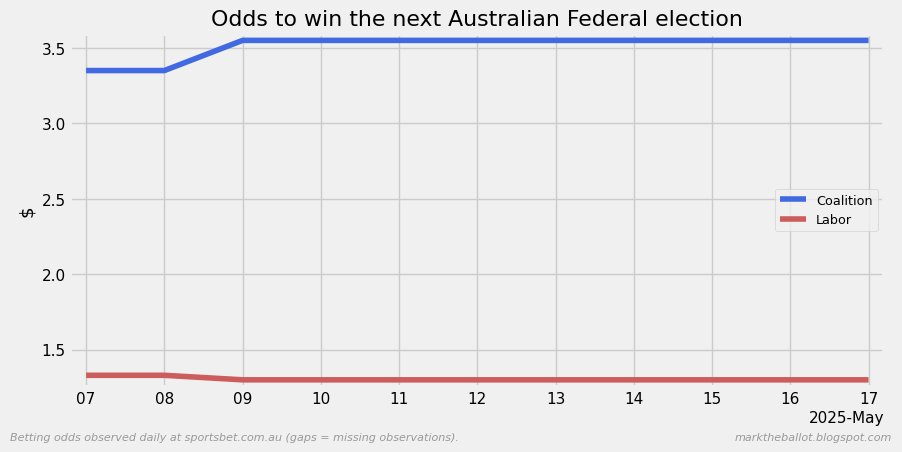

In [5]:
colors = mg.colorise_list(data.columns)
for start in (None,):
    ax = None
    this_data = data if start is None else data.loc[start:]
    print(this_data.index[0], this_data.index[-1])
    for column, color in zip(this_data.columns, colors):
        ax = this_data[column].plot.line(color=color, ax=ax)
    mg.finalise_plot(
        ax,
        title="Odds to win the next Australian Federal election",
        xlabel=None,
        ylabel="$",
        legend=True,
        concise_dates=True,
        tag="" if start is None else start,
        **footers,
        show=SHOW,
    )

In [6]:
def convert(odds: pd.DataFrame) -> pd.DataFrame:
    # get raw probabilities
    raw_probs = 1 / odds

    # remove the bookmakers over-round
    total = raw_probs.sum(axis=1)
    adj_probs = raw_probs.div(total, axis=0)

    return adj_probs
adj_probs = convert(data) * 100

if SHOW:
    display(adj_probs.tail().round(2))

Party,Coalition,Labor
2025-05-13,26.8,73.2
2025-05-14,26.8,73.2
2025-05-15,26.8,73.2
2025-05-16,26.8,73.2
2025-05-17,26.8,73.2


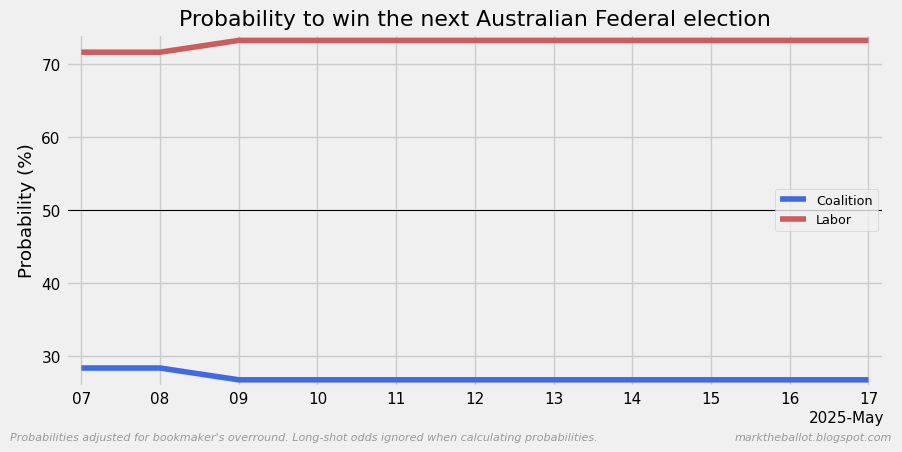

In [7]:
for start in (None,):
    ax = None
    this_data = adj_probs if start is None else adj_probs.loc[start:]
    for column, color in zip(adj_probs.columns, colors):
        ax = this_data[column].plot.line(color=color, ax=ax)

    LFOOTER = (
        "Probabilities adjusted for bookmaker's overround. "
        "Long-shot odds ignored when calculating probabilities. "
    )

    mg.finalise_plot(
        ax,
        title="Probability to win the next Australian Federal election",
        xlabel=None,
        ylabel="Probability (%)",
        legend=True,
        concise_dates=True,
        axhline={"y": 50, "color": "black", "linestyle": "-", "lw": 0.75},
        tag="" if start is None else start,
        rfooter=RFOOTER,
        lfooter=LFOOTER,
        show=SHOW,
    )

## Finished

In [8]:
%load_ext watermark
%watermark --python --machine --conda --iversions --watermark

Python implementation: CPython
Python version       : 3.13.3
IPython version      : 9.2.0

conda environment: n/a

Compiler    : Clang 20.1.0 
OS          : Darwin
Release     : 24.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

mgplot    : 0.0.1
matplotlib: 3.10.3
pandas    : 2.2.3

Watermark: 2.5.0



In [9]:
print("It is done")

It is done
